# Chapter 2 - Flows on the Line

In [1]:
# Setup

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root as sp_root

from utils.solvers import FirstOrderDiffEqn
from utils.solvers.firstorder import num_sol_runge_kutta,num_sol_euler
from utils.plot.utils import draw_circle, draw_arrow

plt.rcParams["figure.figsize"] = (20, 5)

def saveFig(filename, chapter):
  plt.savefig(f"plots/chapter{chapter}/{filename}.png", facecolor="w")

Chapter is concerned with one-dimensional systems $\dot{x} = f(x)$, with $x: \Bbb{R} \mapsto \Bbb{R}$ and $f: \Bbb{R} \mapsto \Bbb{R}$ such that $f$ is continuous.

## $\dot{x} = \sin(x)$

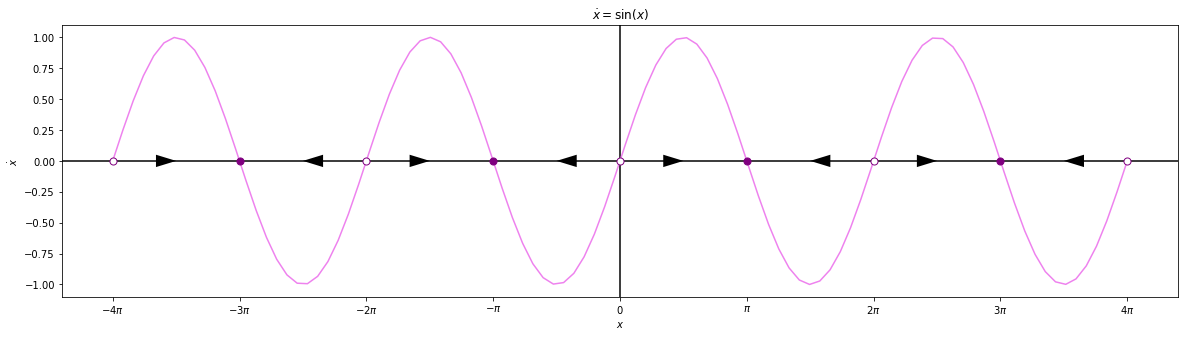

In [2]:
x = np.linspace(-4 * np.pi, 4 * np.pi, 100)
x_dot = np.sin(x)

plt.plot(x, x_dot, color='violet')

plt.axhline(color="black", zorder=-1)
plt.axvline(color="black", zorder=-1)
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")
plt.title("$\dot{x} = \sin(x)$")
plt.xticks(np.linspace(-4 * np.pi, 4 * np.pi, 9), labels=["$-4\pi$", "$-3\pi$", "$-2\pi$", "$-\pi$", "$0$", "$\pi$", "$2\pi$", "$3\pi$", "$4\pi$"])

# Arrow heads
for x in np.linspace(-3.5 * np.pi, 3.5 * np.pi, 8):
  direction = 1 if np.sin(x) > 0 else -1
  plt.arrow(x - 0.5 * direction, 0, 0.001 * direction, 0, head_width=0.1, head_length=0.5, edgecolor='None', facecolor='black')

# Dots
plt.scatter(np.linspace(-4 * np.pi, 4 * np.pi, 5), np.zeros((5, )), s=50, c='white', edgecolors='purple', zorder=10)
plt.scatter(np.linspace(-3 * np.pi, 3 * np.pi, 4), np.zeros((4, )), s=50, c='purple', zorder=10)

plt.show()

- For any given initial position $x_0$, a particle will move to the right if $\dot{x}_0 > 0$, to the left if $\dot{x}_0 < 0$, and will be stationary otherwise
- Filled circles are called **stable fixed points**, **attractors**, or **sinks** and unfilled circles are called **unstable fixed points**, **repellers**, or **sources**

## Population Growth

A simple model of population growth is obtained by assuming that the growth of a population is proportional to the size of the population: $\dot{N} = rN$ where $r \in \Bbb{R}^+$ is a constant, this simple model predicts infinite exponential growth. A better model is obtained by assuming that the growth will stop at some point (due to e.g. resource scarcity)
$$
\begin{equation}
\dot{N} = rN(1 - \frac{N}{K})
\end{equation}
$$
$(1)$ is called the **logistic equation**

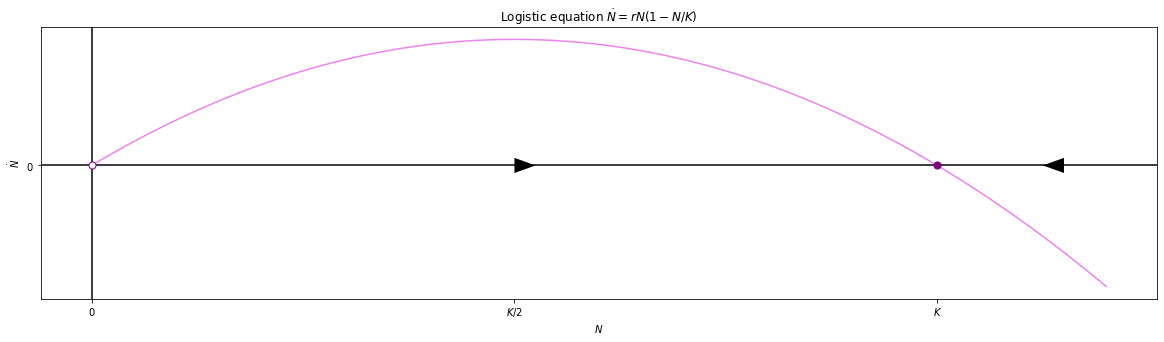

In [3]:
K = 100
r = 1
n = np.linspace(0, K * 1.2, 150)
n_dot = n * r * (1 - n / K)

plt.plot(n, n_dot, color='violet')

plt.axhline(color="black", zorder=-1)
plt.axvline(color="black", zorder=-1)
plt.ylabel("$\dot{N}$")
plt.xlabel("$N$")
plt.title("Logistic equation $\dot{N} = rN (1 - N/K)$")
plt.xticks([0, K/2, K], ["$0$", "$K/2$", "$K$"])
plt.yticks([0], ["$0$"])

plt.scatter([0], [0], s=50, c='white', edgecolor='purple', zorder=10)
plt.scatter([K], [0], s=50, c='purple', zorder=10)
plt.arrow(K/2, 0, 0.001, 0, head_width=3, head_length=2.5, edgecolor='None', facecolor='black')
plt.arrow(K * 1.15, 0, -0.001, 0, head_width=3, head_length=2.5, edgecolor='None', facecolor='black')

plt.show()

- A population starting at $N = 0$ will not grow
- For small $N$ ($N << K/2$) there is an exponential increase
- When $N > K/2$ the growth decelerates
- The population will be stable at $N = K$

The logistic equation works well for simple populations (e.g. bacteria in controlled conditions) but tends to fail for more complex lifeforms/situations.

## Linear Stability Analysis

Consider a small perturbation about a fixed point $x^*$, $\eta(t)$ defined by $x(t) = x^* + \eta(t)$. Taking a Taylor expansion of $f(x) = f(x^* + \eta(t))$ about $x^*$ gives
$$
f(x) = f(x^*) + \eta f'(x^*) + O(\eta^2)
$$
But $x^*$ is a fixed point, so $f(x^*) = 0$, thus
$$
f(x) \approx \eta f'(x^*)
$$
This process is called **linearization**
- Exponential growth if $f'(x^*) > 0$, exponential decay if $f'(x^*) < 0$
- Can't be used in case where $f'(x^*) = 0$ as higher-order terms become non-negligable
- $1/|f'(x^*)|$ is the characteristic timescale for growth/decay near the fixed point

## Limitations of Graphical Approach

Note that using a graphical approach to analysing dynamic systems only works if the system has a unique solution given a certain starting point (this turns out to be the case iff $f$ and $f'$ are continuous)

## Numerical Approximations

### Euler's Method

In time $\Delta t$ a particle moves a distance of approximately $f(x) \Delta t$, so define a sequence such that $x_{n+1} = x_n + f(x) \Delta t$
- Must guess at $x_0$
- Very simple approximation
- Inaccurate unless $\Delta t$ is very small
- First order in $\Delta t$

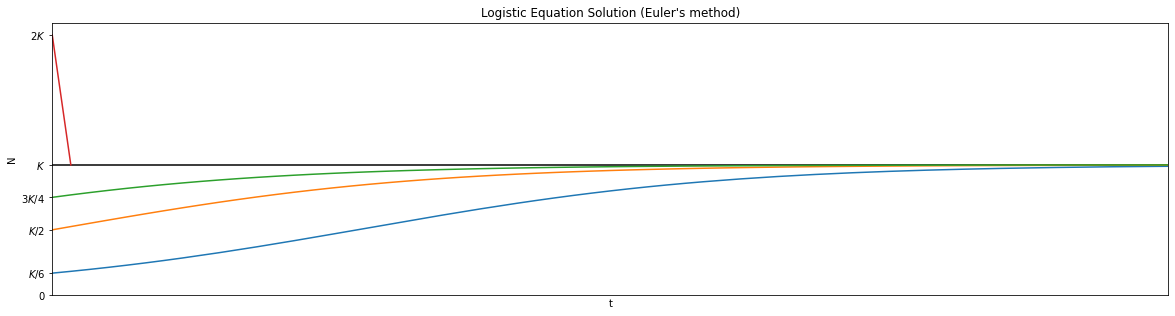

In [4]:
K = 100
r = 1
logistic_fn: FirstOrderDiffEqn = lambda n: n * r * (1 - n / K)

t1, N1 = num_sol_euler(logistic_fn, K/6)
t2, N2 = num_sol_euler(logistic_fn, K/2)
t3, N3 = num_sol_euler(logistic_fn, 3*K/4)
t4, N4 = num_sol_euler(logistic_fn, 2*K)

plt.plot(t1, N1, t2, N2, t3, N3, t4, N4)
plt.xlim(0, 6)
plt.axhline(100, color='black', zorder=-100)
plt.xlabel("t")
plt.xticks([])
plt.ylabel("N")
plt.yticks([0, K/6, K/2, 3 * K/4, K, 2 * K], ["$0$", "$K/6$", "$K/2$", "$3K/4$", "$K$", "$2K$"])
plt.title("Logistic Equation Solution (Euler's method)")

plt.show()

### Improved Euler Method

Rather than just using the value calculated at the start of the step, use the average of the value for the start and end of the step. Define a "trial value" $\tilde{x}_{n+1} = x_n + f(x_n) \Delta t$, then define the actual value as the average of the value calculated from the actual value and the trial value:
$$
x_{n+1} = x_n + \frac{1}{2}[ f(x_n) + f(\tilde{x}_{n + 1}) ] \Delta t
$$
- Second order in $\Delta t$
- Error tends to be smaller for a given $\Delta t$ than in the Euler method
- Requires more computations than the Euler method

### Fourth-order Runge-Kutta Method

- Similar idea to the improved Euler method
- Fourth-order
- Specific choice of coefficients to optimise convergence speed
- Balance between computations required to compute steps, and number of steps to reach desired accuracy

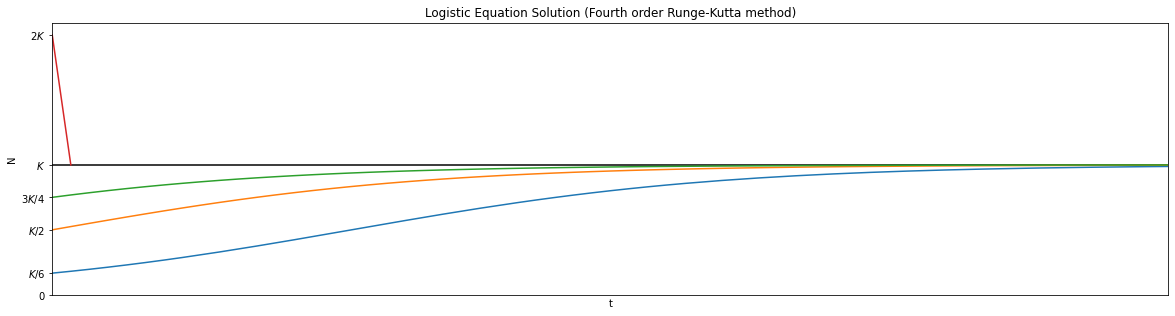

In [5]:
K = 100
r = 1
logistic_fn: FirstOrderDiffEqn = lambda n: n * r * (1 - n / K)

t1, N1 = num_sol_runge_kutta(logistic_fn, K/6)
t2, N2 = num_sol_runge_kutta(logistic_fn, K/2)
t3, N3 = num_sol_runge_kutta(logistic_fn, 3*K/4)
t4, N4 = num_sol_runge_kutta(logistic_fn, 2*K)

plt.plot(t1, N1, t2, N2, t3, N3, t4, N4)
plt.xlim(0, 6)
plt.axhline(100, color='black', zorder=-100)
plt.xlabel("t")
plt.xticks([])
plt.ylabel("N")
plt.yticks([0, K/6, K/2, 3 * K/4, K, 2 * K], ["$0$", "$K/6$", "$K/2$", "$3K/4$", "$K$", "$2K$"])
plt.title("Logistic Equation Solution (Fourth order Runge-Kutta method)")

plt.show()

- In practice, good idea to use automatic step size control (increase/decrease step size depending on the value of $f(x)$ and/or $t$)
- Note that very small $\Delta t$ leads to more floating point errors